## Linear Regression

Lineer regresyon bir veya birden fazla (bağımsız) değişken ile başka bir (bağımlı) değişken arasındaki bağlantıyı modellemek için kullanılan bir yöntemdir. 

Herhangi bir lineer fonksiyonu şu şekilde ifade edebiliriz:

**f(x)=y=w0+w1x1+w2x2**

Lineer regresyon ile amacımız verilmiş olan x’leri ve y’leri kullanarak w değerlerini bulmak. w değerlerini bulduktan sonra artık y değeri bilinmeyen ama x değerleri verilmiş olan bir veri ile y değeri hesaplanabilecek.

## Maliyet Fonksiyonu

Lineer regresyonda w değer­lerini öyle bir şek­ilde bulun­malı ki tah­min edilen y değeri ile gerçek y değeri arasın­daki hata min­i­mum olsun. Bu durumda asıl amacımız gerçek y değer­leri ile tah­min edilen y değer­leri arasın­daki farkı göstere­cek olan maliyet fonksiy­onunu (cost func­tion) min­i­mize etmek. Maliyet fonksiy­onu şu şek­ilde gösterilmektedir:

![title](maliyet_fonksiyonu.png)

Buradaki nota­sy­on­lar şun­ları ifade etmektedir:

* x^i: verisetinde i numar­alı satırın özel­lik­leri.
* f(x^i): tah­min edilen y değeri
* y^i: asıl y değeri

Tah­min edilen y ile asıl y değerini çıkardığımızda asılında farkı elde etmiş oluy­oruz fakat negatif değer­leri ortadan kaldır­mak için karesini alıy­oruz. En sonunda hesa­planan maliyetin 1/2 ile çarpıl­ması ise gelenek­sel bir durum.

## Python ile Linear Regression

### Adım 1

In [11]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Adım 2

In [48]:
# import data
df = pd.read_csv("student_scores.csv")

In [49]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Görselleştirme yapıyoruz:

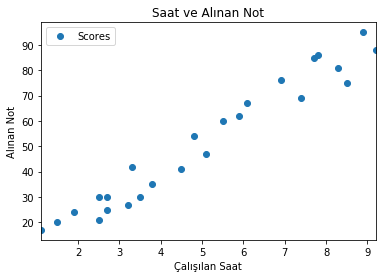

In [66]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Saat ve Alınan Not')
plt.xlabel('Çalışılan Saat')
plt.ylabel('Alınan Not')
plt.show()

### Adım 3

In [53]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

### Adım 4

Verimizi train ve test olmak üzere ikiye ayırıyoruz. Burada %20 test verisi mevcut olarak ve %80'de eğitim verisi olacak. Random_state değerini 42 verdiğimiz zaman test ve eğitim verisi olarak böleceği zaman her daim aynı şekilde böler.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Adım 5

Lineer regresyon algoritmamızı ekliyoruz.

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print(regressor.intercept_)

2.018160041434683


In [57]:
print(regressor.coef_)

[9.91065648]


### Adım 6

In [58]:
y_pred = regressor.predict(X_test)

In [59]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Adım 7

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


> Son Güncelleme: 2 Aralık 2020 - Perşembe